## Introduction to Fourier Transformations for Signal Processing
At a super high level, a Fourier Transformation is a function thats takes a signal within the time domain and then converts it into the frequency domain. This is useful because it allows us to see periodicity within the data. The data we are using represents the brightness of a star over time. If an exoplanet passes in front of a star its brightness will decrease. Thus by using Fourier Transformations we can find the period of the dimming of the star and therefore finding the period of an orbiting exoplanet. Note that this data is simulated and is not real data from a telescope, it is a few waves with a large amount of noise added to it.

We calculate the power of each frequency using the formula $P(f_0)=|X(f_0)|^2$ where $f_0$ is a specific frequency and $X(f_0)$ is the Fourier Transformation. The power of a frequency tells you how much of the original signal is made up of that frequency. We can see that there are four distinct peaks meaning there are four primary waves that make up the original signal. 

Text(0.5, 1.0, 'Power Spectrum of Signal')

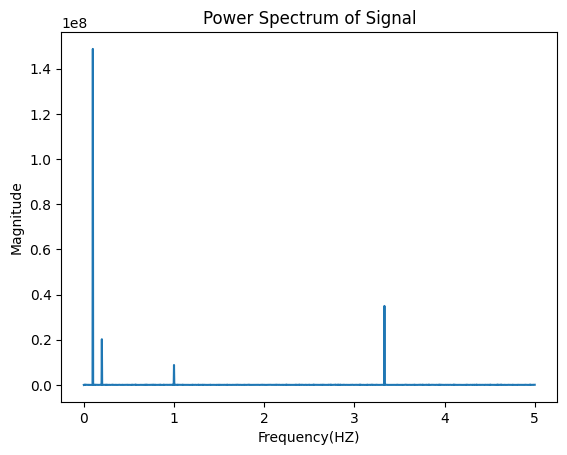

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('data/Prob1.csv')

fourier_data = np.fft.rfft(data['signal'])
y =abs(fourier_data)**2
x =np.fft.rfftfreq(len(data['time']),0.1)
plt.plot(x,y)
plt.xlabel('Frequency(HZ)')
plt.ylabel('Magnitude')
plt.title('Power Spectrum of Signal')

Now we find the 4 most powerful frequencies and their corresponding periods. We can convert from frequency to period using the formula $P=\frac{1}{F}$ where $T$ is the period and $F$ is the frequency.

In [16]:
periods = [] 
max_power_idices = []

for _ in range(4):
    max_power_idx = np.argmax(y)
    max_power_idices.append(max_power_idx)
    dominant_frequency = x[max_power_idx]
    periods.append(1 / dominant_frequency) 
    y[max_power_idx] = 0 

print(*periods) 

10.0 0.3 5.0 1.0


Now we are going to calculate the amplitude of the waves using the formula $A = \frac{1}{N} \left| \mathcal{F}(f) \right| \times 2$. This formula may seem unintutive but when you break down its parts it actually makes a lot of sense. $\left| \mathcal{F}(f) \right|$ gives us the total contribution of the frequency $f$ over the entire observed time period. We want to get its contribution at a given instance so we normalize it by dividing by the number of observations $N$. Now we have the contribution of each frequency but there is a problem. The Fourier Transformation considers $\text{sin}(x)$ and $\text{sin}(-x)$ to be different frequencies even though they are the same just phase shifted by $\pi$. To account for this we multiply by 2, thus giving us the formula $A = \frac{1}{N} \left| \mathcal{F}(f) \right| \times 2$.

In [17]:
contribution = abs(fourier_data)

amplitudes = []
for i in range(4):
    amplitudes.append((1/len(data['time']) * 2 * contribution[max_power_idices[i]]))

Now we calculate out the phase of these waves using the equation $\phi =
\arctan\left(\frac{\operatorname{Im}(\mathcal{F}(f))}{\operatorname{Re}(\mathcal{F}(f))}\right)$. This formula is derived from the fact that every single frequency is represented as a complex number with a real part representing cosine and an imaginary part representing sine. Thus the angle or portion of the two can tell us how offset the wave is from the origin. 

In [18]:
phase_data = []
for i in range(4):
    phase_data.append(fourier_data[max_power_idices[i]])

phases = []
for i in range(4):
    phases.append(np.arctan2(np.imag(phase_data[i]),np.real(phase_data[i])))

Now that we have found the phase, amplitude and period of the wave we can graph them out and see how they fit the original data.

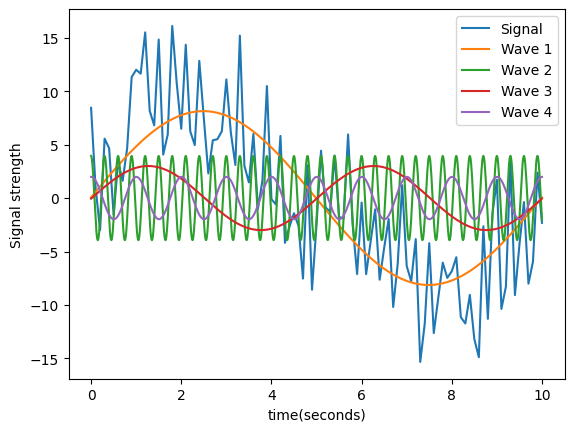

In [19]:
def coswave(t, A, period, phase):
    return A*np.cos((2*np.pi/period*t)+phase)
small_data=data[data['time']<=10]
wave_time=np.linspace(0,10,1000)

waves = []
for i in range(4):
    waves.append(coswave(wave_time, amplitudes[i], periods[i], phases[i]))

plt.plot(small_data['time'],small_data['signal'],label='Signal')
for i in range(4):
    plt.plot(wave_time, waves[i], label=f'Wave {i+1}')
plt.xlabel('time(seconds)')
plt.ylabel('Signal strength')
plt.legend()

Now summing together the waves we can see that they fit the original data nicely. The errors are likely caused by noise within the data. 

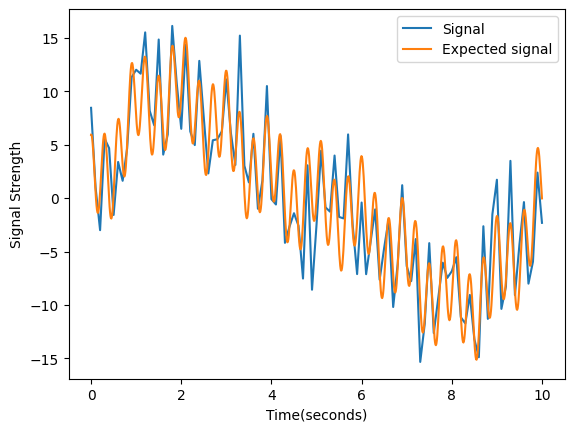

In [20]:
wave_sum = sum(waves)
plt.plot(small_data['time'],small_data['signal'],label='Signal')
plt.plot(wave_time,wave_sum,label='Expected signal')
plt.xlabel('Time(seconds)')
plt.ylabel('Signal Strength')
plt.legend()